<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9627897	total: 62.2ms	remaining: 1m 2s
1:	learn: 0.9436887	total: 77.3ms	remaining: 38.5s
2:	learn: 0.9219441	total: 79.6ms	remaining: 26.5s
3:	learn: 0.9044463	total: 82.4ms	remaining: 20.5s
4:	learn: 0.8881674	total: 85.1ms	remaining: 16.9s
5:	learn: 0.8710393	total: 87.5ms	remaining: 14.5s
6:	learn: 0.8534136	total: 90ms	remaining: 12.8s
7:	learn: 0.8369688	total: 91.8ms	remaining: 11.4s
8:	learn: 0.8221679	total: 93.7ms	remaining: 10.3s
9:	learn: 0.8049327	total: 95.9ms	remaining: 9.5s
10:	learn: 0.7890601	total: 98.5ms	remaining: 8.86s
11:	learn: 0.7753996	total: 101ms	remaining: 8.32s
12:	learn: 0.7621246	total: 106ms	remaining: 8.02s
13:	learn: 0.7464985	total: 109ms	remaining: 7.65s
14:	learn: 0.7336208	total: 113ms	remaining: 7.41s
15:	learn: 0.7196212	total: 116ms	remaining: 7.12s
16:	learn: 0.7080930	total: 122ms	remaining: 7.06s
17:	learn: 0.6954841	total: 125ms	remaining: 6.8s
18:	learn: 0.6822638	total: 127ms	remaining: 6.57s
19:	l

38:	learn: 0.5031822	total: 176ms	remaining: 4.33s
39:	learn: 0.4951184	total: 179ms	remaining: 4.29s
40:	learn: 0.4890524	total: 181ms	remaining: 4.22s
41:	learn: 0.4817656	total: 183ms	remaining: 4.17s
42:	learn: 0.4761171	total: 185ms	remaining: 4.12s
43:	learn: 0.4707469	total: 188ms	remaining: 4.09s
44:	learn: 0.4654419	total: 192ms	remaining: 4.07s
45:	learn: 0.4595440	total: 195ms	remaining: 4.05s
46:	learn: 0.4535140	total: 200ms	remaining: 4.06s
47:	learn: 0.4474062	total: 204ms	remaining: 4.05s
48:	learn: 0.4421659	total: 207ms	remaining: 4.02s
49:	learn: 0.4381998	total: 210ms	remaining: 3.99s
50:	learn: 0.4327399	total: 213ms	remaining: 3.96s
51:	learn: 0.4280946	total: 215ms	remaining: 3.92s
52:	learn: 0.4229998	total: 218ms	remaining: 3.89s
53:	learn: 0.4194403	total: 219ms	remaining: 3.83s
54:	learn: 0.4156736	total: 223ms	remaining: 3.83s
55:	learn: 0.4112652	total: 226ms	remaining: 3.81s
56:	learn: 0.4074236	total: 228ms	remaining: 3.77s
57:	learn: 0.4034779	total: 231

94:	learn: 0.3015255	total: 334ms	remaining: 3.18s
95:	learn: 0.2997957	total: 336ms	remaining: 3.17s
96:	learn: 0.2980029	total: 339ms	remaining: 3.15s
97:	learn: 0.2959147	total: 341ms	remaining: 3.14s
98:	learn: 0.2944851	total: 344ms	remaining: 3.13s
99:	learn: 0.2929403	total: 347ms	remaining: 3.12s
100:	learn: 0.2913766	total: 349ms	remaining: 3.11s
101:	learn: 0.2898371	total: 352ms	remaining: 3.1s
102:	learn: 0.2884760	total: 354ms	remaining: 3.08s
103:	learn: 0.2873112	total: 356ms	remaining: 3.07s
104:	learn: 0.2861211	total: 359ms	remaining: 3.06s
105:	learn: 0.2847174	total: 361ms	remaining: 3.05s
106:	learn: 0.2834613	total: 364ms	remaining: 3.04s
107:	learn: 0.2817789	total: 367ms	remaining: 3.03s
108:	learn: 0.2803571	total: 369ms	remaining: 3.02s
109:	learn: 0.2793158	total: 372ms	remaining: 3.01s
110:	learn: 0.2776181	total: 374ms	remaining: 3s
111:	learn: 0.2764494	total: 377ms	remaining: 2.99s
112:	learn: 0.2751349	total: 379ms	remaining: 2.97s
113:	learn: 0.2734547	

144:	learn: 0.2425224	total: 493ms	remaining: 2.9s
145:	learn: 0.2416963	total: 496ms	remaining: 2.9s
146:	learn: 0.2412740	total: 499ms	remaining: 2.89s
147:	learn: 0.2402432	total: 500ms	remaining: 2.88s
148:	learn: 0.2395836	total: 503ms	remaining: 2.87s
149:	learn: 0.2383652	total: 505ms	remaining: 2.86s
150:	learn: 0.2375726	total: 508ms	remaining: 2.86s
151:	learn: 0.2368035	total: 511ms	remaining: 2.85s
152:	learn: 0.2361820	total: 513ms	remaining: 2.84s
153:	learn: 0.2352737	total: 515ms	remaining: 2.83s
154:	learn: 0.2347638	total: 518ms	remaining: 2.82s
155:	learn: 0.2342780	total: 520ms	remaining: 2.81s
156:	learn: 0.2335518	total: 523ms	remaining: 2.81s
157:	learn: 0.2327591	total: 525ms	remaining: 2.8s
158:	learn: 0.2318992	total: 528ms	remaining: 2.79s
159:	learn: 0.2314314	total: 531ms	remaining: 2.79s
160:	learn: 0.2306334	total: 533ms	remaining: 2.78s
161:	learn: 0.2299116	total: 536ms	remaining: 2.77s
162:	learn: 0.2286343	total: 539ms	remaining: 2.77s
163:	learn: 0.2

212:	learn: 0.1996289	total: 662ms	remaining: 2.45s
213:	learn: 0.1994433	total: 665ms	remaining: 2.44s
214:	learn: 0.1990931	total: 667ms	remaining: 2.44s
215:	learn: 0.1985659	total: 670ms	remaining: 2.43s
216:	learn: 0.1979957	total: 673ms	remaining: 2.43s
217:	learn: 0.1973116	total: 675ms	remaining: 2.42s
218:	learn: 0.1967021	total: 678ms	remaining: 2.42s
219:	learn: 0.1963815	total: 681ms	remaining: 2.41s
220:	learn: 0.1960788	total: 684ms	remaining: 2.41s
221:	learn: 0.1955948	total: 688ms	remaining: 2.41s
222:	learn: 0.1951399	total: 690ms	remaining: 2.4s
223:	learn: 0.1944142	total: 693ms	remaining: 2.4s
224:	learn: 0.1937384	total: 698ms	remaining: 2.4s
225:	learn: 0.1931987	total: 700ms	remaining: 2.4s
226:	learn: 0.1926830	total: 703ms	remaining: 2.39s
227:	learn: 0.1922143	total: 705ms	remaining: 2.39s
228:	learn: 0.1918297	total: 709ms	remaining: 2.39s
229:	learn: 0.1912712	total: 712ms	remaining: 2.38s
230:	learn: 0.1909398	total: 714ms	remaining: 2.38s
231:	learn: 0.19

254:	learn: 0.1812542	total: 804ms	remaining: 2.35s
255:	learn: 0.1808944	total: 806ms	remaining: 2.34s
256:	learn: 0.1804424	total: 809ms	remaining: 2.34s
257:	learn: 0.1800562	total: 812ms	remaining: 2.33s
258:	learn: 0.1794073	total: 815ms	remaining: 2.33s
259:	learn: 0.1789486	total: 817ms	remaining: 2.33s
260:	learn: 0.1787905	total: 819ms	remaining: 2.32s
261:	learn: 0.1783246	total: 822ms	remaining: 2.31s
262:	learn: 0.1779454	total: 824ms	remaining: 2.31s
263:	learn: 0.1774703	total: 826ms	remaining: 2.3s
264:	learn: 0.1770736	total: 829ms	remaining: 2.3s
265:	learn: 0.1764123	total: 831ms	remaining: 2.29s
266:	learn: 0.1763368	total: 834ms	remaining: 2.29s
267:	learn: 0.1757566	total: 836ms	remaining: 2.28s
268:	learn: 0.1751336	total: 839ms	remaining: 2.28s
269:	learn: 0.1746231	total: 841ms	remaining: 2.27s
270:	learn: 0.1741612	total: 844ms	remaining: 2.27s
271:	learn: 0.1735015	total: 846ms	remaining: 2.27s
272:	learn: 0.1728261	total: 849ms	remaining: 2.26s
273:	learn: 0.

299:	learn: 0.1621343	total: 1.03s	remaining: 2.41s
300:	learn: 0.1618397	total: 1.04s	remaining: 2.41s
301:	learn: 0.1612589	total: 1.04s	remaining: 2.4s
302:	learn: 0.1609475	total: 1.04s	remaining: 2.4s
303:	learn: 0.1605486	total: 1.04s	remaining: 2.39s
304:	learn: 0.1602903	total: 1.05s	remaining: 2.39s
305:	learn: 0.1599184	total: 1.05s	remaining: 2.38s
306:	learn: 0.1596986	total: 1.05s	remaining: 2.38s
307:	learn: 0.1594256	total: 1.06s	remaining: 2.37s
308:	learn: 0.1590678	total: 1.06s	remaining: 2.37s
309:	learn: 0.1584431	total: 1.06s	remaining: 2.36s
310:	learn: 0.1579217	total: 1.06s	remaining: 2.36s
311:	learn: 0.1576836	total: 1.07s	remaining: 2.35s
312:	learn: 0.1571062	total: 1.07s	remaining: 2.35s
313:	learn: 0.1567359	total: 1.07s	remaining: 2.34s
314:	learn: 0.1564201	total: 1.07s	remaining: 2.34s
315:	learn: 0.1560086	total: 1.08s	remaining: 2.33s
316:	learn: 0.1556306	total: 1.08s	remaining: 2.33s
317:	learn: 0.1553967	total: 1.08s	remaining: 2.32s
318:	learn: 0.

350:	learn: 0.1429400	total: 1.2s	remaining: 2.23s
351:	learn: 0.1425343	total: 1.21s	remaining: 2.23s
352:	learn: 0.1422759	total: 1.22s	remaining: 2.23s
353:	learn: 0.1419425	total: 1.22s	remaining: 2.23s
354:	learn: 0.1416120	total: 1.22s	remaining: 2.22s
355:	learn: 0.1412496	total: 1.23s	remaining: 2.22s
356:	learn: 0.1410036	total: 1.23s	remaining: 2.22s
357:	learn: 0.1405316	total: 1.23s	remaining: 2.21s
358:	learn: 0.1402307	total: 1.24s	remaining: 2.21s
359:	learn: 0.1398563	total: 1.24s	remaining: 2.2s
360:	learn: 0.1394889	total: 1.27s	remaining: 2.25s
361:	learn: 0.1392888	total: 1.27s	remaining: 2.25s
362:	learn: 0.1390987	total: 1.28s	remaining: 2.25s
363:	learn: 0.1387328	total: 1.29s	remaining: 2.26s
364:	learn: 0.1386213	total: 1.3s	remaining: 2.26s
365:	learn: 0.1383115	total: 1.3s	remaining: 2.25s
366:	learn: 0.1382169	total: 1.3s	remaining: 2.25s
367:	learn: 0.1379086	total: 1.31s	remaining: 2.24s
368:	learn: 0.1376569	total: 1.31s	remaining: 2.24s
369:	learn: 0.137

384:	learn: 0.1337046	total: 1.36s	remaining: 2.17s
385:	learn: 0.1332244	total: 1.36s	remaining: 2.17s
386:	learn: 0.1329180	total: 1.36s	remaining: 2.16s
387:	learn: 0.1326480	total: 1.36s	remaining: 2.15s
388:	learn: 0.1325708	total: 1.37s	remaining: 2.15s
389:	learn: 0.1323215	total: 1.37s	remaining: 2.14s
390:	learn: 0.1320720	total: 1.37s	remaining: 2.14s
391:	learn: 0.1318190	total: 1.37s	remaining: 2.13s
392:	learn: 0.1315397	total: 1.38s	remaining: 2.13s
393:	learn: 0.1311660	total: 1.38s	remaining: 2.12s
394:	learn: 0.1308596	total: 1.38s	remaining: 2.11s
395:	learn: 0.1305652	total: 1.38s	remaining: 2.11s
396:	learn: 0.1304378	total: 1.38s	remaining: 2.1s
397:	learn: 0.1301325	total: 1.39s	remaining: 2.1s
398:	learn: 0.1298655	total: 1.39s	remaining: 2.1s
399:	learn: 0.1296073	total: 1.4s	remaining: 2.09s
400:	learn: 0.1293022	total: 1.4s	remaining: 2.09s
401:	learn: 0.1290393	total: 1.4s	remaining: 2.08s
402:	learn: 0.1287691	total: 1.4s	remaining: 2.08s
403:	learn: 0.12869

430:	learn: 0.1221975	total: 1.5s	remaining: 1.98s
431:	learn: 0.1218171	total: 1.51s	remaining: 1.98s
432:	learn: 0.1215849	total: 1.51s	remaining: 1.98s
433:	learn: 0.1212453	total: 1.51s	remaining: 1.97s
434:	learn: 0.1209466	total: 1.52s	remaining: 1.97s
435:	learn: 0.1205978	total: 1.52s	remaining: 1.97s
436:	learn: 0.1203144	total: 1.53s	remaining: 1.97s
437:	learn: 0.1200851	total: 1.53s	remaining: 1.96s
438:	learn: 0.1198388	total: 1.53s	remaining: 1.96s
439:	learn: 0.1197167	total: 1.53s	remaining: 1.95s
440:	learn: 0.1196481	total: 1.54s	remaining: 1.95s
441:	learn: 0.1195516	total: 1.54s	remaining: 1.94s
442:	learn: 0.1192189	total: 1.54s	remaining: 1.94s
443:	learn: 0.1191936	total: 1.54s	remaining: 1.93s
444:	learn: 0.1190221	total: 1.55s	remaining: 1.93s
445:	learn: 0.1187075	total: 1.55s	remaining: 1.93s
446:	learn: 0.1183904	total: 1.56s	remaining: 1.93s
447:	learn: 0.1181266	total: 1.56s	remaining: 1.92s
448:	learn: 0.1178658	total: 1.56s	remaining: 1.92s
449:	learn: 0

476:	learn: 0.1126389	total: 1.64s	remaining: 1.8s
477:	learn: 0.1124304	total: 1.64s	remaining: 1.79s
478:	learn: 0.1122080	total: 1.64s	remaining: 1.79s
479:	learn: 0.1119290	total: 1.65s	remaining: 1.78s
480:	learn: 0.1119128	total: 1.65s	remaining: 1.78s
481:	learn: 0.1116853	total: 1.65s	remaining: 1.77s
482:	learn: 0.1114076	total: 1.65s	remaining: 1.77s
483:	learn: 0.1111983	total: 1.65s	remaining: 1.76s
484:	learn: 0.1109863	total: 1.66s	remaining: 1.76s
485:	learn: 0.1108814	total: 1.66s	remaining: 1.76s
486:	learn: 0.1108005	total: 1.66s	remaining: 1.75s
487:	learn: 0.1105277	total: 1.67s	remaining: 1.75s
488:	learn: 0.1102318	total: 1.67s	remaining: 1.75s
489:	learn: 0.1099165	total: 1.67s	remaining: 1.74s
490:	learn: 0.1096616	total: 1.68s	remaining: 1.74s
491:	learn: 0.1093995	total: 1.68s	remaining: 1.73s
492:	learn: 0.1090699	total: 1.68s	remaining: 1.73s
493:	learn: 0.1087545	total: 1.68s	remaining: 1.72s
494:	learn: 0.1084994	total: 1.69s	remaining: 1.72s
495:	learn: 0

532:	learn: 0.1012773	total: 1.79s	remaining: 1.57s
533:	learn: 0.1009471	total: 1.8s	remaining: 1.57s
534:	learn: 0.1008682	total: 1.8s	remaining: 1.56s
535:	learn: 0.1007981	total: 1.8s	remaining: 1.56s
536:	learn: 0.1006225	total: 1.8s	remaining: 1.55s
537:	learn: 0.1004196	total: 1.81s	remaining: 1.55s
538:	learn: 0.1004025	total: 1.81s	remaining: 1.55s
539:	learn: 0.1002741	total: 1.81s	remaining: 1.54s
540:	learn: 0.1000629	total: 1.82s	remaining: 1.54s
541:	learn: 0.0998735	total: 1.82s	remaining: 1.54s
542:	learn: 0.0996484	total: 1.82s	remaining: 1.53s
543:	learn: 0.0994538	total: 1.82s	remaining: 1.53s
544:	learn: 0.0992204	total: 1.83s	remaining: 1.52s
545:	learn: 0.0990690	total: 1.83s	remaining: 1.52s
546:	learn: 0.0989031	total: 1.83s	remaining: 1.52s
547:	learn: 0.0987481	total: 1.84s	remaining: 1.51s
548:	learn: 0.0984693	total: 1.84s	remaining: 1.51s
549:	learn: 0.0983489	total: 1.84s	remaining: 1.51s
550:	learn: 0.0980837	total: 1.91s	remaining: 1.56s
551:	learn: 0.09

566:	learn: 0.0952860	total: 1.97s	remaining: 1.5s
567:	learn: 0.0951188	total: 1.97s	remaining: 1.5s
568:	learn: 0.0949495	total: 1.97s	remaining: 1.49s
569:	learn: 0.0947189	total: 1.98s	remaining: 1.49s
570:	learn: 0.0946278	total: 1.98s	remaining: 1.49s
571:	learn: 0.0944446	total: 2s	remaining: 1.5s
572:	learn: 0.0942245	total: 2s	remaining: 1.49s
573:	learn: 0.0940749	total: 2s	remaining: 1.49s
574:	learn: 0.0939376	total: 2.01s	remaining: 1.48s
575:	learn: 0.0937786	total: 2.01s	remaining: 1.48s
576:	learn: 0.0935805	total: 2.01s	remaining: 1.48s
577:	learn: 0.0933842	total: 2.02s	remaining: 1.47s
578:	learn: 0.0931478	total: 2.02s	remaining: 1.47s
579:	learn: 0.0930093	total: 2.02s	remaining: 1.46s
580:	learn: 0.0928260	total: 2.02s	remaining: 1.46s
581:	learn: 0.0926707	total: 2.04s	remaining: 1.46s
582:	learn: 0.0926123	total: 2.04s	remaining: 1.46s
583:	learn: 0.0923415	total: 2.04s	remaining: 1.45s
584:	learn: 0.0921866	total: 2.04s	remaining: 1.45s
585:	learn: 0.0919625	to

608:	learn: 0.0879263	total: 2.14s	remaining: 1.37s
609:	learn: 0.0878300	total: 2.14s	remaining: 1.37s
610:	learn: 0.0876933	total: 2.14s	remaining: 1.36s
611:	learn: 0.0874694	total: 2.15s	remaining: 1.36s
612:	learn: 0.0873421	total: 2.15s	remaining: 1.36s
613:	learn: 0.0871222	total: 2.15s	remaining: 1.35s
614:	learn: 0.0869895	total: 2.15s	remaining: 1.35s
615:	learn: 0.0867791	total: 2.16s	remaining: 1.34s
616:	learn: 0.0865301	total: 2.16s	remaining: 1.34s
617:	learn: 0.0863138	total: 2.16s	remaining: 1.34s
618:	learn: 0.0862177	total: 2.16s	remaining: 1.33s
619:	learn: 0.0860678	total: 2.17s	remaining: 1.33s
620:	learn: 0.0859289	total: 2.17s	remaining: 1.32s
621:	learn: 0.0859055	total: 2.17s	remaining: 1.32s
622:	learn: 0.0858474	total: 2.17s	remaining: 1.32s
623:	learn: 0.0856935	total: 2.18s	remaining: 1.31s
624:	learn: 0.0855816	total: 2.18s	remaining: 1.31s
625:	learn: 0.0854363	total: 2.18s	remaining: 1.3s
626:	learn: 0.0853466	total: 2.19s	remaining: 1.3s
627:	learn: 0.

666:	learn: 0.0793908	total: 2.31s	remaining: 1.15s
667:	learn: 0.0791792	total: 2.31s	remaining: 1.15s
668:	learn: 0.0790478	total: 2.32s	remaining: 1.15s
669:	learn: 0.0789661	total: 2.32s	remaining: 1.14s
670:	learn: 0.0787579	total: 2.32s	remaining: 1.14s
671:	learn: 0.0787373	total: 2.33s	remaining: 1.14s
672:	learn: 0.0786196	total: 2.33s	remaining: 1.13s
673:	learn: 0.0785324	total: 2.33s	remaining: 1.13s
674:	learn: 0.0784384	total: 2.34s	remaining: 1.13s
675:	learn: 0.0783885	total: 2.34s	remaining: 1.12s
676:	learn: 0.0781612	total: 2.34s	remaining: 1.12s
677:	learn: 0.0780347	total: 2.35s	remaining: 1.11s
678:	learn: 0.0779471	total: 2.35s	remaining: 1.11s
679:	learn: 0.0777902	total: 2.35s	remaining: 1.1s
680:	learn: 0.0776820	total: 2.35s	remaining: 1.1s
681:	learn: 0.0775669	total: 2.35s	remaining: 1.1s
682:	learn: 0.0773525	total: 2.36s	remaining: 1.09s
683:	learn: 0.0772722	total: 2.36s	remaining: 1.09s
684:	learn: 0.0771511	total: 2.36s	remaining: 1.09s
685:	learn: 0.0

742:	learn: 0.0699995	total: 2.49s	remaining: 862ms
743:	learn: 0.0698968	total: 2.49s	remaining: 858ms
744:	learn: 0.0697861	total: 2.5s	remaining: 855ms
745:	learn: 0.0697001	total: 2.5s	remaining: 851ms
746:	learn: 0.0696194	total: 2.5s	remaining: 848ms
747:	learn: 0.0695520	total: 2.5s	remaining: 844ms
748:	learn: 0.0693356	total: 2.51s	remaining: 841ms
749:	learn: 0.0692430	total: 2.51s	remaining: 837ms
750:	learn: 0.0691066	total: 2.51s	remaining: 833ms
751:	learn: 0.0690384	total: 2.52s	remaining: 830ms
752:	learn: 0.0689491	total: 2.52s	remaining: 826ms
753:	learn: 0.0688569	total: 2.52s	remaining: 823ms
754:	learn: 0.0687530	total: 2.53s	remaining: 820ms
755:	learn: 0.0686430	total: 2.53s	remaining: 817ms
756:	learn: 0.0684597	total: 2.53s	remaining: 813ms
757:	learn: 0.0684164	total: 2.53s	remaining: 809ms
758:	learn: 0.0683872	total: 2.54s	remaining: 805ms
759:	learn: 0.0682821	total: 2.54s	remaining: 802ms
760:	learn: 0.0681384	total: 2.54s	remaining: 798ms
761:	learn: 0.06

817:	learn: 0.0628413	total: 2.67s	remaining: 595ms
818:	learn: 0.0627673	total: 2.67s	remaining: 591ms
819:	learn: 0.0626575	total: 2.68s	remaining: 588ms
820:	learn: 0.0625508	total: 2.68s	remaining: 584ms
821:	learn: 0.0625153	total: 2.68s	remaining: 581ms
822:	learn: 0.0624978	total: 2.68s	remaining: 577ms
823:	learn: 0.0623777	total: 2.69s	remaining: 574ms
824:	learn: 0.0622613	total: 2.69s	remaining: 570ms
825:	learn: 0.0621630	total: 2.69s	remaining: 567ms
826:	learn: 0.0620896	total: 2.69s	remaining: 563ms
827:	learn: 0.0619575	total: 2.69s	remaining: 560ms
828:	learn: 0.0618463	total: 2.7s	remaining: 556ms
829:	learn: 0.0617492	total: 2.7s	remaining: 553ms
830:	learn: 0.0616005	total: 2.7s	remaining: 549ms
831:	learn: 0.0615169	total: 2.7s	remaining: 546ms
832:	learn: 0.0614543	total: 2.7s	remaining: 542ms
833:	learn: 0.0613484	total: 2.71s	remaining: 539ms
834:	learn: 0.0612442	total: 2.71s	remaining: 535ms
835:	learn: 0.0611649	total: 2.71s	remaining: 532ms
836:	learn: 0.061

876:	learn: 0.0574167	total: 2.84s	remaining: 398ms
877:	learn: 0.0573421	total: 2.84s	remaining: 395ms
878:	learn: 0.0572568	total: 2.85s	remaining: 392ms
879:	learn: 0.0571866	total: 2.85s	remaining: 389ms
880:	learn: 0.0570944	total: 2.85s	remaining: 386ms
881:	learn: 0.0569983	total: 2.86s	remaining: 382ms
882:	learn: 0.0568956	total: 2.86s	remaining: 379ms
883:	learn: 0.0568004	total: 2.86s	remaining: 376ms
884:	learn: 0.0567281	total: 2.87s	remaining: 372ms
885:	learn: 0.0566262	total: 2.87s	remaining: 369ms
886:	learn: 0.0565557	total: 2.87s	remaining: 366ms
887:	learn: 0.0565183	total: 2.87s	remaining: 363ms
888:	learn: 0.0563910	total: 2.88s	remaining: 359ms
889:	learn: 0.0563267	total: 2.88s	remaining: 356ms
890:	learn: 0.0562439	total: 2.89s	remaining: 353ms
891:	learn: 0.0562032	total: 2.89s	remaining: 350ms
892:	learn: 0.0560192	total: 2.89s	remaining: 346ms
893:	learn: 0.0559293	total: 2.89s	remaining: 343ms
894:	learn: 0.0558407	total: 2.9s	remaining: 340ms
895:	learn: 0

947:	learn: 0.0517567	total: 3.01s	remaining: 165ms
948:	learn: 0.0516966	total: 3.02s	remaining: 162ms
949:	learn: 0.0516160	total: 3.02s	remaining: 159ms
950:	learn: 0.0515618	total: 3.02s	remaining: 156ms
951:	learn: 0.0514863	total: 3.02s	remaining: 152ms
952:	learn: 0.0514571	total: 3.03s	remaining: 149ms
953:	learn: 0.0513721	total: 3.03s	remaining: 146ms
954:	learn: 0.0513586	total: 3.03s	remaining: 143ms
955:	learn: 0.0513498	total: 3.03s	remaining: 140ms
956:	learn: 0.0512790	total: 3.04s	remaining: 136ms
957:	learn: 0.0511990	total: 3.04s	remaining: 133ms
958:	learn: 0.0511258	total: 3.04s	remaining: 130ms
959:	learn: 0.0511035	total: 3.04s	remaining: 127ms
960:	learn: 0.0510311	total: 3.04s	remaining: 124ms
961:	learn: 0.0509646	total: 3.05s	remaining: 120ms
962:	learn: 0.0508967	total: 3.05s	remaining: 117ms
963:	learn: 0.0508276	total: 3.05s	remaining: 114ms
964:	learn: 0.0507706	total: 3.06s	remaining: 111ms
965:	learn: 0.0506973	total: 3.08s	remaining: 108ms
966:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2516829890329526
ABC Pre-generator MAE 0.2683063925508306


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

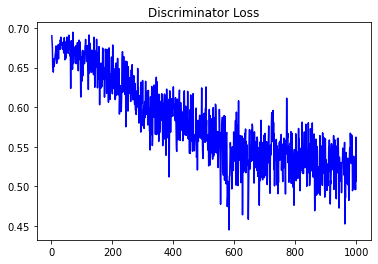

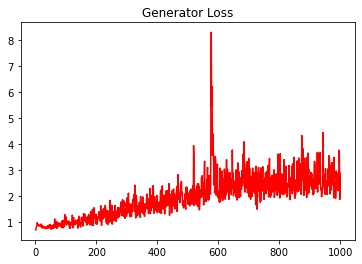

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2749480716687828


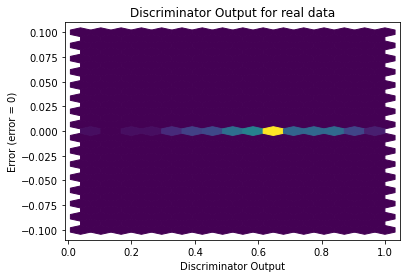

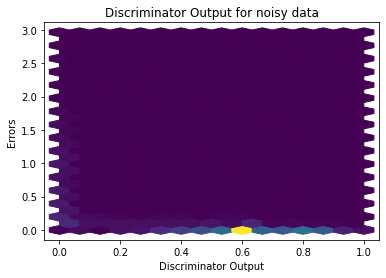

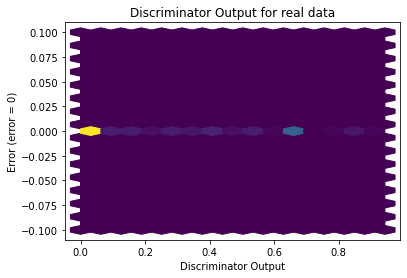

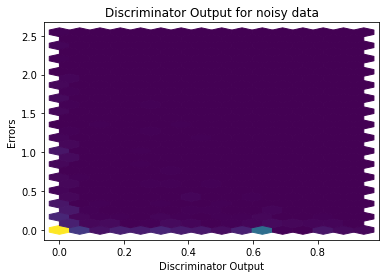

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())